# Assignment 3 - 1A (MLFFNN)

Team members:
- N Sowmya Manojna (BE17B007)
- Thakkar Riya Anandbhai (PH17B010)
- Chaithanya Krishna Moorthy (PH17B011)

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import warnings
warnings.filterwarnings("ignore")

## Reading the data, Splitting it

In [2]:
# Get the data
column_names = ["x1", "x2", "y"]
df = pd.read_csv("../datasets/1A/train.csv", names=column_names)
df_test = pd.read_csv("../datasets/1A/dev.csv", names=column_names)
display(df.head())

# Split dev into test and validation
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=42)
display(df_val.head())
display(df_test.head())

,x1,x2,y
0,-7.811425,1.910665,1.0
1,-0.856640,-9.639107,3.0
2,2.885077,4.785598,0.0
3,-1.405758,-7.364262,3.0
4,0.044472,-8.998423,3.0


,x1,x2,y
30,-8.107918,4.250882,1.0
53,3.864959,4.817073,0.0
118,4.211548,4.436624,0.0
9,3.234165,4.870823,0.0
33,7.908264,-11.186126,2.0


,x1,x2,y
44,-9.647875,1.662953,1.0
47,7.821765,-7.188280,2.0
4,-7.206942,0.939950,1.0
55,-8.203673,2.077040,1.0
26,-0.753439,-10.491104,3.0


In [3]:
X_train = df[["x1", "x2"]].to_numpy()
y_train = df["y"].to_numpy().astype("int")

X_val = df_val[["x1", "x2"]].to_numpy()
y_val = df_val["y"].to_numpy().astype("int")

X_test = df_test[["x1", "x2"]].to_numpy()
y_test = df_test["y"].to_numpy().astype("int")

## Training the Model

In [4]:
parameters = {"hidden_layer_sizes":[5,8,10,15], "activation":["logistic", "tanh", "relu"], \
              "solver":["lbfgs", "sgd", "adam"], "batch_size":[100, 200, "auto"], \
              "alpha":[0, 0.0001], "learning_rate":["constant", "adaptive", "invscaling"], \
             }

mlp = MLPClassifier(random_state=1)

clf = GridSearchCV(mlp, parameters, verbose=1, n_jobs=6)
clf.fit(X_train, y_train)
result_df = pd.DataFrame(clf.cv_results_)
result_df.to_csv("../parameter_search/1A_MLFFNN.csv")
result_df = result_df.sort_values(by=["rank_test_score", "mean_fit_time"])
result_df.head()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   28.3s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   56.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 3240 out of 3240 | elapsed:  3.8min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.007819,0.000230,0.000362,0.000005,logistic,0,100,5,invscaling,lbfgs,"{'activation': 'logistic', 'alpha': 0, 'batch_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
21,0.009853,0.000505,0.000442,0.000017,logistic,0,100,10,adaptive,lbfgs,"{'activation': 'logistic', 'alpha': 0, 'batch_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
60,0.010174,0.000407,0.000449,0.000011,logistic,0,200,10,invscaling,lbfgs,"{'activation': 'logistic', 'alpha': 0, 'batch_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
24,0.010182,0.000995,0.000485,0.000082,logistic,0,100,10,invscaling,lbfgs,"{'activation': 'logistic', 'alpha': 0, 'batch_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
51,0.010695,0.000704,0.000449,0.000021,logistic,0,200,8,invscaling,lbfgs,"{'activation': 'logistic', 'alpha': 0, 'batch_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [5]:
best_mlp = clf.best_estimator_
print("Best Parameters Choosen:")
for i in clf.best_params_:
    print("  - ", i, ": ", clf.best_params_[i], sep="")

Best Parameters Choosen:
  - activation: logistic
  - alpha: 0
  - batch_size: 100
  - hidden_layer_sizes: 5
  - learning_rate: constant
  - solver: lbfgs


Accuracy: 100.0


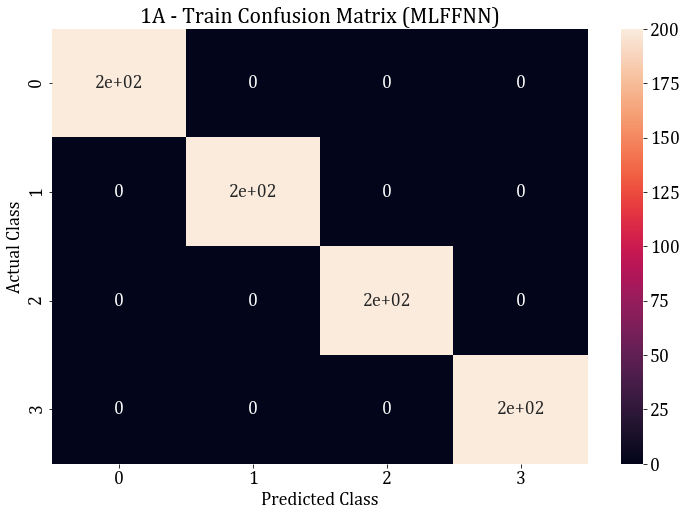

Validation Accuracy: 100.0


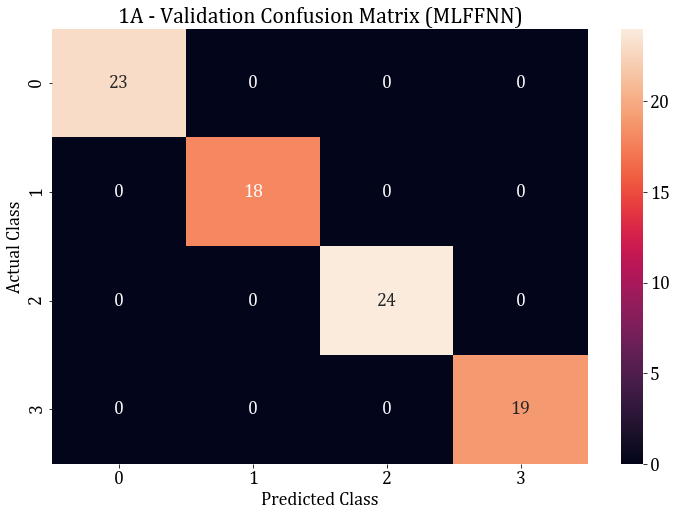

Validation Accuracy: 100.0


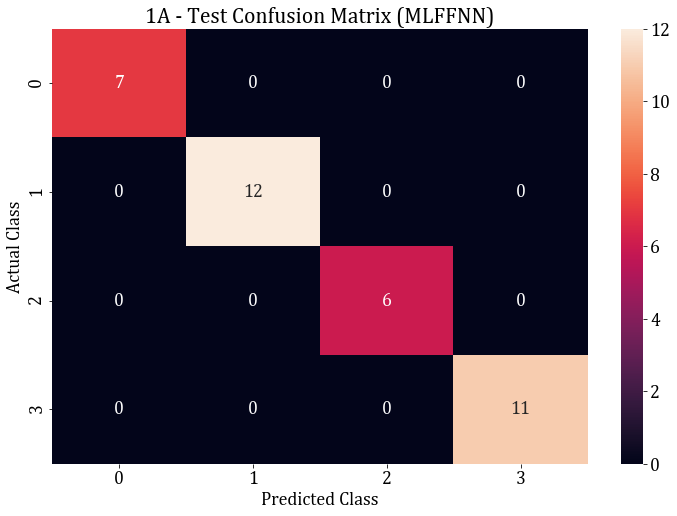

In [7]:

y_pred = best_mlp.predict(X_train)
print("Accuracy:", 100*np.sum(y_pred==y_train)/y_train.size)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("1A - Train Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1A_MLFFNN_train_confmat.png")
plt.show()

y_val_pred = best_mlp.predict(X_val)
print("Validation Accuracy:", 100*np.sum(y_val_pred==y_val)/y_val.size)
val_conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure()
sns.heatmap(val_conf_mat, annot=True)
plt.title("1A - Validation Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1A_MLFFNN_val_confmat.png")
plt.show()

y_test_pred = best_mlp.predict(X_test)
print("Validation Accuracy:", 100*np.sum(y_test_pred==y_test)/y_test.size)
test_conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(test_conf_mat, annot=True)
plt.title("1A - Test Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1A_MLFFNN_test_confmat.png")
plt.show()

## Visualising the decision boundaries

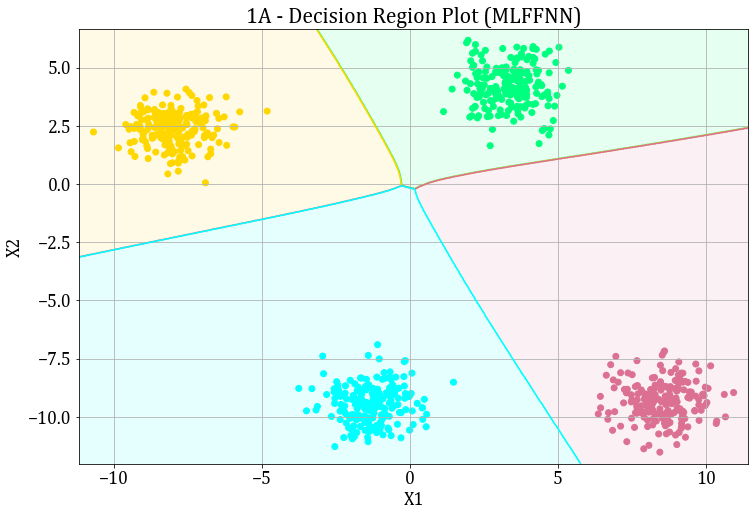

In [8]:
h = 0.02
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pro = np.argmax(best_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z_pro = Z_pro.reshape(xx.shape)

color_list = ["springgreen", "gold", "palevioletred", "cyan"]
plt.title("1A - Decision Region Plot (MLFFNN)")
plt.contourf(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=0.1)
plt.contour(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=1)
plt.scatter(X_train[:,0], X_train[:,1], c=[color_list[i] for i in y_train])
plt.xlabel("X1")
plt.ylabel("X2")
plt.savefig("images/1A_MLFFNN_Decision_Plot.png")
plt.show()